In this notebook provided Data Quality Check Layer which includes:
- Checking for data formats validity
- Data takes on expected and correct values
- Verifying there are no missing values and duplicates
- Find if there are outliners

### STEP 0: Importing all neccessary libraries, loading data and declaring main functions

In [90]:
import numpy as np 
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

from thefuzz import fuzz

In [4]:
PATH = '../data/raw_data/'

In [8]:
train = pd.read_csv(os.path.join(PATH, 'sales_train.csv'))
test = pd.read_csv(os.path.join(PATH, 'test.csv'))
shops = pd.read_csv(os.path.join(PATH, 'shops.csv'))
item_categories = pd.read_csv(os.path.join(PATH, 'item_categories.csv'))
items = pd.read_csv(os.path.join(PATH, 'items.csv'))

In [11]:
def get_general_info(df: pd.DataFrame) -> None:
    """
    Function to get general information about the input DataFrame.

    Args:
        The input DataFrame.
    """
    df.info()
    display(df.head())
    display(df.describe())

In [ ]:
def is_negative(col: pd.Series) -> bool:
    """
    Function checks for negative values in columns.

    Args:
        The input column in DataFrame.
    """
    return (col < 0).any()

In [ ]:
def count_negatives(col: pd.Series) -> int:
    """
    Function counts negative values in columns.

    Args:
        The input column in DataFrame.
    """
    return (col < 0).sum()

In [ ]:
def get_missing_info(df: pd.DataFrame) -> None:
    """
    Function to get information about the missed data.

    Args:
        The input DataFrame.
    """
    fig, ax = plt.subplots()
    sns.heatmap(df.isnull(), cbar=False, ax=ax)
    ax.set_title("Missing values")
    plt.show()

    missing_values = df.isnull().sum().to_frame()
    missing_values.columns = ['Missing values']
    missing_values['%'] = round(missing_values['Missing values'] / len(df), 2)
    display(missing_values)

In [ ]:
def get_duplicates_info(df: pd.DataFrame) -> None:
    """
    Function counts duplicates in DataFrame and their percentage.

    Args:
        The input DataFrame.
    """
    sum_duplicates = df.duplicated().sum()
    per_duplicates = df.duplicated().mean()
    print(f"Num of duplicates: {sum_duplicates}")
    print(f"Percentage of duplicates: {round(per_duplicates * 100, 4)}%")

In [91]:
def find_fuzzy_duplicates(data: pd.Series, threshold: int = 90) -> list[tuple[str, str, int]]:
    """
    Function finds fuzzy duplicates in a list of strings with a given similarity threshold.

    Args:
        data (list[str]): List of strings to check.
        threshold (int): Similarity threshold in percent (0 to 100).
                        String pairs with similarity above this threshold will be considered duplicates.

    Returns:
        List[Tuple[str, str, int]]: List of tuples, where each tuple contains
                                    two similar strings and their similarity percentage.
    """
    duplicates = []
    checked_items = set()

    for i in range(len(data)):
        if data[i] in checked_items:
            continue
            
        for j in range(i + 1, len(data)):
            if data[j] in checked_items:
                continue

            s1 = data[i].lower()
            s2 = data[j].lower()
            
            similarity_ratio = fuzz.ratio(s1, s2)

            if similarity_ratio >= threshold:
                duplicates.append((data[i], data[j], similarity_ratio))
                checked_items.add(data[j])

    return duplicates

### STEP 1: Exploring train dataset

In [12]:
get_general_info(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


Column 'date' has wrong format.

In [67]:
cols =  train.columns
for col in cols[1:6]: #excluding 'date' column because of type
    print(f"There are negative values in {col}. Amount of it: {count_negatives(train[col])}" if is_negative(train[col])
          else f"No negative values in {col}")

No negative values in date_block_num
No negative values in shop_id
No negative values in item_id
There are negative values in item_price. Amount of it: 1
There are negative values in item_cnt_day. Amount of it: 7356


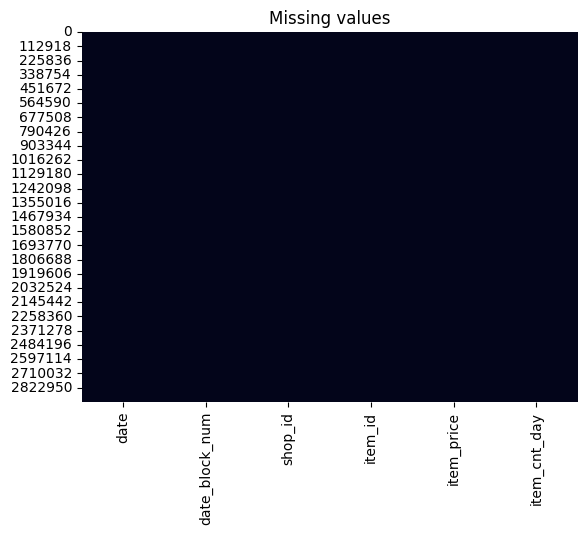

,Missing values,%
date,0,0.0
date_block_num,0,0.0
shop_id,0,0.0
item_id,0,0.0
item_price,0,0.0
item_cnt_day,0,0.0


In [43]:
get_missing_info(train)

There are no missing values! It's cool.

In [52]:
get_duplicates_info(train)

Num of duplicates: 6
Percentage of duplicates: 0.0002%


Num of duplicates says that we can easily drop it on ETL step.

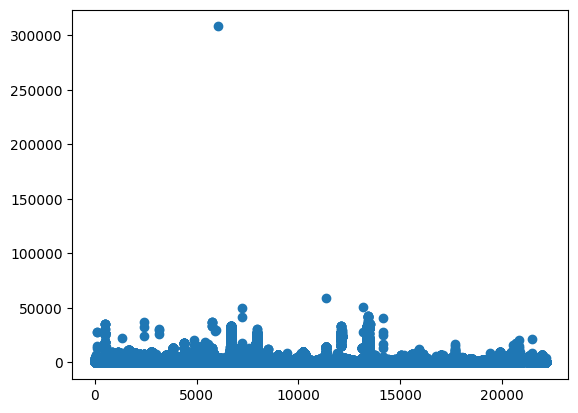

In [102]:
plt.scatter(train['item_id'], train['item_price'])

On this step we can see an obvious outliner in 'item_price'

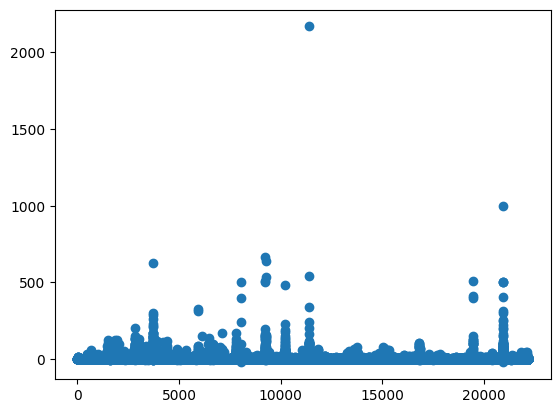

In [ ]:
plt.scatter(train['item_id'],train['item_cnt_day'])

Outliners in 'item_cnt_day'. In the competition task we were given the condition that a range of prediction will be [0,20]

### STEP 2: Exploring shops.csv 

In [68]:
get_general_info(shops)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


,shop_id
count,60.000000
mean,29.500000
std,17.464249
min,0.000000
25%,14.750000
50%,29.500000
75%,44.250000
max,59.000000


There are duplicated shops which we cant't detect using ```duplicated()``` function because names differs by one symbol in this dataframe. Also we can notice that this dataframe includes both shop name and adresses.

In [97]:
similar_shops= find_fuzzy_duplicates(shops['shop_name'], threshold=85)

if similar_shops:
    print(f"Found potential duplicates (similarity >= 85%):")
    for item1, item2, score in similar_shops:
        print(f"- '{item1}' и '{item2}' (Similarity: {score}%)")
else:
    print("Potential duplicates not found.")

Found potential duplicates (similarity >= 85%):
- '!Якутск Орджоникидзе, 56 фран' и 'Якутск Орджоникидзе, 56' (Similarity: 88%)
- '!Якутск ТЦ "Центральный" фран' и 'Якутск ТЦ "Центральный"' (Similarity: 88%)
- 'Жуковский ул. Чкалова 39м?' и 'Жуковский ул. Чкалова 39м²' (Similarity: 96%)
- 'Москва ТК "Буденовский" (пав.А2)' и 'Москва ТК "Буденовский" (пав.К7)' (Similarity: 94%)
- 'РостовНаДону ТРК "Мегацентр Горизонт"' и 'РостовНаДону ТРК "Мегацентр Горизонт" Островной' (Similarity: 88%)


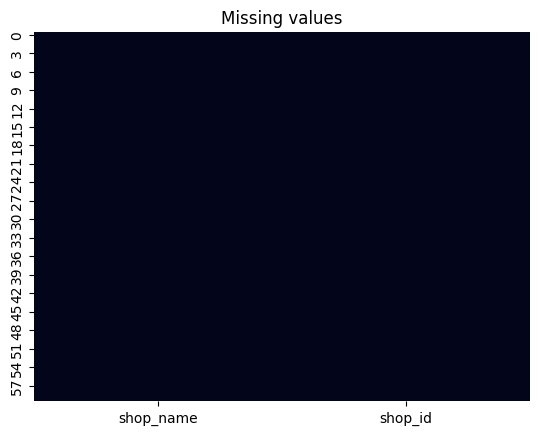

,Missing values,%
shop_name,0,0.0
shop_id,0,0.0


In [70]:
get_missing_info(shops)

In [77]:
col = 'shop_id'
print(f"There are negative values in {col}. Amount of it: {count_negatives(shops[col])}" if is_negative(shops[col])
        else f"No negative values in {col}")

No negative values in shop_id


### STEP 3: Exploring items.csv

In [79]:
get_general_info(items)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


,item_id,item_category_id
count,22170.00000,22170.000000
mean,11084.50000,46.290753
std,6400.07207,15.941486
min,0.00000,0.000000
25%,5542.25000,37.000000
50%,11084.50000,40.000000
75%,16626.75000,58.000000
max,22169.00000,83.000000


In [80]:
get_duplicates_info(items)

Num of duplicates: 0
Percentage of duplicates: 0.0%


This doesn't mean anything

In [ ]:
print("There are negative item_id!" if is_negative(items['item_id']) else "All fine!")
print("There are negative item_category_id!" if is_negative(items['item_category_id']) else "All fine!")

All fine!
All fine!


In [117]:
#Is there items which not in test?
unique_values = test[~test['item_id'].isin(items['item_id'])]
num_of_new_items = unique_values['item_id'].unique()
print(len(num_of_new_items))

0


In [118]:
#Is there items which not in train?
unique_values = train[~train['item_id'].isin(items['item_id'])]
num_of_new_items = unique_values['item_id'].unique()
print(len(num_of_new_items))

0


In [ ]:
#Is there items which do not have category?
unique_values = items[~items['item_category_id'].isin(item_categories['item_category_id'])]
num_of_new_items = unique_values['item_category_id'].unique()
print(len(num_of_new_items))

0


### STEP 4: Exploring item_categories.csv

In [113]:
get_general_info(item_categories)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


,item_category_id
count,84.000000
mean,41.500000
std,24.392622
min,0.000000
25%,20.750000
50%,41.500000
75%,62.250000
max,83.000000


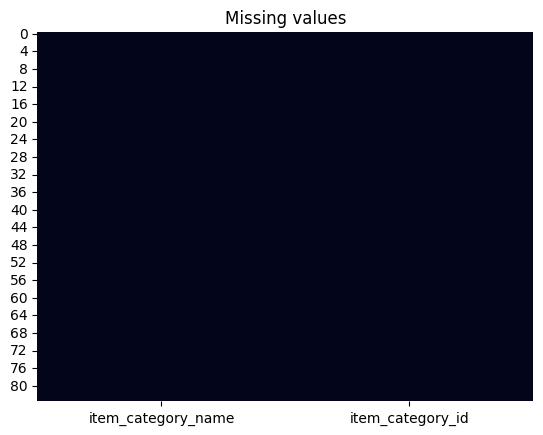

,Missing values,%
item_category_name,0,0.0
item_category_id,0,0.0


In [114]:
get_missing_info(item_categories)

In [115]:
get_duplicates_info(item_categories)

Num of duplicates: 0
Percentage of duplicates: 0.0%


In [128]:
print("There are negative item_id!" if is_negative(item_categories['item_category_id']) else "All fine!")

All fine!


### STEP 5: Exploring test.csv

In [123]:
get_general_info(test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


,ID,shop_id,item_id
count,214200.000000,214200.000000,214200.000000
mean,107099.500000,31.642857,11019.398627
std,61834.358168,17.561933,6252.644590
min,0.000000,2.000000,30.000000
25%,53549.750000,16.000000,5381.500000
50%,107099.500000,34.500000,11203.000000
75%,160649.250000,47.000000,16071.500000
max,214199.000000,59.000000,22167.000000


In [ ]:
#Are there items which we've never seen in train?
unique_values = test[~test['item_id'].isin(train['item_id'])]
num_of_new_items = unique_values['item_id'].unique()
print(len(num_of_new_items))

363


In [129]:
print("There are negative item_id!" if is_negative(test['item_id']) else "All fine!")
print("There are negative item_id!" if is_negative(test['shop_id']) else "All fine!")

All fine!
All fine!


### Summary

- One negative price
- Cnt outliners
- Price outliner
- Test set has some new items which weren't included in the train set
- Shops are repeated in shops.csv